# Probabilistic Linear Classification

Linear classification refers to a fitting process where decision boundary can be described by **general linear function**. Usually it does not mean the decision boundary is a line, but with a form of general linear function $y(\boldsymbol{x}) = \boldsymbol{w}^T\boldsymbol{\phi(x)}$. But more often than not, it has the form:

$$
y(\boldsymbol{x}) = f(\boldsymbol{w}^T\boldsymbol{x} + w_0)
$$

where $f(·)$ is a nonlinear function and defined as **activation function**.

To do classfication, there are usually two ways: 

1. Nonprobabilistic method, depending on discriminant function without probability, which only tells us an effectively binary results
2. Probabilistic method including generative model and discrimitive model, which can yield probability of the observation if it belongs to some classes

Here we focus on **Probabilistic method**, including **generative model** and **discrimitive model**.

Either model is highly related to Bayes' theorem:

$$
P(C_k|\boldsymbol{x})=\frac{P(\boldsymbol{x}|C_k)P(C_k)}{\sum_{j=1}^KP(\boldsymbol{x}|C_j)P(C_j)}\propto P(\boldsymbol{x}|C_k)P(C_k)
$$

Both generative model and discrimitive model eventually ONLY care about $P(C_k|\boldsymbol{x})$, but with different **start points**:
1. **Gnerative** model is a detailed guy, starting from $P(\boldsymbol{x}|C_k)P(C_k)$, i.e. the joint distribution $P(\boldsymbol{x}, C_k)$, by "guessing" mathmetical forms of both $P(\boldsymbol{x}|C_k)$ and $P(C_k)$.
2. **Discrimitive** model is a straightforward guy, starting from $P(C_k|\boldsymbol{x})$ directily, by "guessing" a mathmetical form of $P(C_k|\boldsymbol{x})$.

Though it seems that **generative model** is more powerful to describe the classes distribution in detail. But there are two problems:
1. Usually it will be hard to "guess" the distribution function of $P(\boldsymbol{x}|C_k)$. Actually normal distribution is the most popular option. But there could be many complicated $P(\boldsymbol{x}|C_k)$ cannot be well described by parameters.
2. It usually has more parameters to fit which requires more data.

Therefore **discrimitive model** is more efficient in a lot of cases. After all, it only need to guess $P(C_k|\boldsymbol{x})$, which is easier (See **Tricks** below).

--------
**Tricks:**

If we define:

$$
\frac{P(\boldsymbol{x}|C_k)P(C_k)}{\sum_{k=1}^KP(\boldsymbol{x}|C_k)P(C_k)}
= \frac{\exp(a_k)}{\sum_{j=1}^K\exp(a_j)}
$$

where $a_k = \ln P(\boldsymbol{x}|C_k)P(C_k)$, then we have the **softmax function**. This is one of the most popular form used in the **discrimitive model**.

## Generative model
### Algebra
As aforementioned, generative model looks for a "detailed" modeling, where $P(C_k)$ and $P(\boldsymbol{x}|C_k)$ have to be specified respectively. Most popular parameters for $P(C_k)$ are $\boldsymbol{u}$, ($u_k$ corresponds to the probability of class k). Most popular decription for $P(\boldsymbol{x}|C_k)$ is a normal distribution $\mathscr{N}(\boldsymbol{x}|\boldsymbol{\mu}_k, \Sigma_k)$. If one hot encoding is applied to feature the class by $\boldsymbol{t}$, then,

$$
P(C_k|\boldsymbol{x}) \propto P(\boldsymbol{x}|C_k)P(C_k) 
= \prod_{k=1}^K (u_k\mathscr{N}(\boldsymbol{x}|\boldsymbol{\mu}_k, \Sigma_k))^{t_k}
$$

For a likelihood function:

$$
P(T|X, \boldsymbol{u}, \boldsymbol{\mu}_1, ..., \boldsymbol{\mu}_K, {\Sigma}_1, ..., {\Sigma}_K) 
\propto \prod_{n=1}^N \prod_{k=1}^K (u_k\mathscr{N}(\boldsymbol{x}_n|\boldsymbol{\mu}_k, \Sigma_k))^{t_{nk}}
$$

Actually we can change the symbol of $\propto$ to $=$, since it can be ignored that the denominater which is a function of X.

To set the derivative with respect to $u_k$ to be zero, s.t. $\sum_{k=1}^Ku_k = 1$, it can be found that 

$$
u_k = \frac{N_k}{N}
$$

To set the derivative with respect to $\boldsymbol{\mu}_k$ to be zero, it can be found that 

$$
\boldsymbol{\mu}_k = \frac{1}{N_k}\sum_{n \in C_k}\boldsymbol{x}_n 
$$

To set the derivative with respect to $\Sigma_k$ to be zero, it can be found that 

$$
\Sigma_k = \frac{1}{N_k}\sum_{n\in C_k}(\boldsymbol{x}_n - \boldsymbol{\mu}_k)(\boldsymbol{x}_n - \boldsymbol{\mu}_k)^T
$$


If all classes share a same $\Sigma$, then 

$$
\Sigma = \sum_{k=1}^K\frac{N_k}{N}\Sigma_k
=\frac{1}{N}\sum_{k=1}^K\sum_{n\in C_k}(\boldsymbol{x}_n - \boldsymbol{\mu}_k)(\boldsymbol{x}_n - \boldsymbol{\mu}_k)^T
$$

All the results above are within expectation and similar to the case of fitting normal distribution. More comments on the case of the shared $\Sigma$: In such case, there are effectively **K datasets** (corresponding to K classes), all of which have the same covariance but different mean. Thus to estimate $\Sigma$, we should take an average on them with **different weights** proportional to $\frac{N_k}{N}$.

**With all the parameters in hand, we could classify the observation $\boldsymbol{x}_s$ into the class $k_s$ with largest $u_{k_s}\mathscr{N}(\boldsymbol{x}_s|\boldsymbol{\mu}_{k_s}, \Sigma_{k_s})$ and this value stands for PROBABILITY**. 

### Simulation
There are two cases being discussed, one is for the shared $\Sigma$ and the other is for the different individual $\Sigma_k$. For simplicity, only two-class problem is under consideration.

For the shared $\Sigma$, the decision boundary is **linear** while for the different individual $\Sigma_k$, the decision boundary is **nonlinear** (more specifically **parabola**). These can be derived by some algebra (see details in the **Algebra section of Discrimitive model**).

It is interesting that $u_k$ will not affect the boundary dramatically in the current case. By increasing the ratio of $\frac{u_1}{u_2}$ from 1 to 100, the decision boundary just shifts a little. This is due to the fact that in $u_{k_s}\mathscr{N}(\boldsymbol{x}_s|\boldsymbol{\mu}_{k_s}, \Sigma_{k_s})$, $\mathscr{N}(\boldsymbol{x}_s|\boldsymbol{\mu}_{k_s}, \Sigma_{k_s})$ is more dominant which evolve in an exponential way. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

NUM_C_1 = 500
NUM_C_2 = 500

##### fitting parameters #####
def fit_parameters(C_1, C_2, is_share = True):
    num_1, num_2 = len(C_1), len(C_2)
    u_1 = num_1 / (num_1 + num_2) 
    u_2 = num_2 / (num_1 + num_2)
    mu_1, mu_2 = C_1.mean(axis = 0), C_2.mean(axis = 0)
    if is_share:
        sigma = ((C_1 - mu_1).T.dot(C_1 - mu_1) + (C_2 - mu_2).T.dot(C_2 - mu_2).T) / (num_1 + num_2) 
        return u_1, u_2, mu_1, mu_2, sigma, sigma
    else:
        sigma_1 = (C_1 - mu_1).T.dot(C_1 - mu_1) / num_1
        sigma_2 = (C_2 - mu_2).T.dot(C_2 - mu_2) / num_2
        return u_1, u_2, mu_1, mu_2, sigma_1, sigma_2
        
                                    
def plot_classes(C_1, C_2, u_1, u_2, mu_1, mu_2, sigma_1, sigma_2, ax):
    X = np.arange(-8, 8, 0.1)
    Y = np.arange(-8, 8, 0.1)
    X, Y = np.meshgrid (X, Y)
    X_tmp = np.concatenate((np.reshape(X, X.shape + (1,)), np.reshape(Y, Y.shape + (1, ))), axis = 2)
    mn_C_1, mn_C_2 = mn(mu_1, sigma_1), mn(mu_2, sigma_2)
    Z_C_1, Z_C_2 = u_1*mn_C_1.pdf(X_tmp), u_2*mn_C_2.pdf(X_tmp)
    Z = Z_C_1 > Z_C_2
    ax.scatter(C_1.T[0], C_1.T[1], c = "r")
    ax.scatter(C_2.T[0], C_2.T[1], c = "b")
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.contourf(X, Y, Z, cmap = "jet", alpha = 0.3)



Text(0.5,1,'Individual Sigmas with \n nonlinear decision boundary (50000 vs 500)')

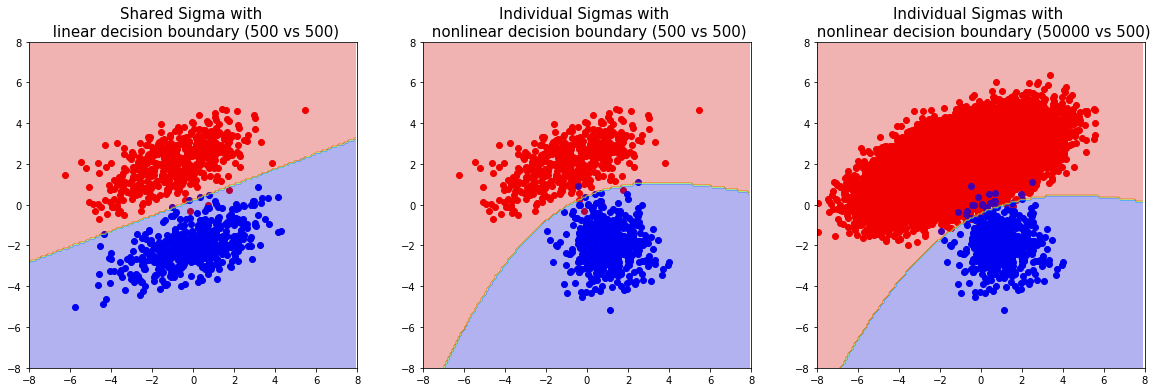

In [2]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
C_1 = np.random.multivariate_normal([-1,2], [[3,1],[1,1]] , NUM_C_1)
C_2 = np.random.multivariate_normal([0,-2], [[3,1],[1,1]] , NUM_C_2)
u_1, u_2, mu_1, mu_2, sigma_1, sigma_2 = fit_parameters(C_1, C_2)
plot_classes(C_1, C_2, u_1, u_2, mu_1, mu_2, sigma_1, sigma_2, axes[0])
axes[0].set_title("Shared Sigma with \n linear decision boundary (500 vs 500)", fontsize = 15)

C_2 = np.random.multivariate_normal([1,-2], [[1, 0],[0, 1]] , NUM_C_2)
u_1, u_2, mu_1, mu_2, sigma_1, sigma_2 = fit_parameters(C_1, C_2, False)
plot_classes(C_1, C_2, u_1, u_2, mu_1, mu_2, sigma_1, sigma_2, axes[1])
axes[1].set_title("Individual Sigmas with \n nonlinear decision boundary (500 vs 500)", fontsize = 15)

C_1 = np.random.multivariate_normal([-1,2], [[3,1],[1,1]] , NUM_C_1*100)
u_1, u_2, mu_1, mu_2, sigma_1, sigma_2 = fit_parameters(C_1, C_2, False)
plot_classes(C_1, C_2, u_1, u_2, mu_1, mu_2, sigma_1, sigma_2, axes[2])
axes[2].set_title("Individual Sigmas with \n nonlinear decision boundary (50000 vs 500)", fontsize = 15)


## Discrimitive model
### Algebra
The disrimitive model will make use of basis functions as the case of general linear regression. $y(\boldsymbol{\phi(\boldsymbol{x})})$ is used to model $P(C_k|\boldsymbol{x})$ and the most popular discrimitive model is based on softmax function:

$$
P(C_k|\boldsymbol{x})=y_k(\boldsymbol{\phi(\boldsymbol{x})})
=\frac{\exp(\boldsymbol{w_k}^T\boldsymbol{\phi})}{\sum_{j=1}^K\exp(\boldsymbol{w_j}^T\boldsymbol{\phi})}
$$

For two-class problem it will be more concise as sigmoid function $\sigma(\boldsymbol{w}^T\boldsymbol{\phi})$.

In the case of the previous generative model with the **shared $\Sigma$** normal distributions,  $P(C_k|\boldsymbol{x})$ is in the form of softmax function $\frac{\exp(\boldsymbol{w_k}^T\boldsymbol{x}+w_{k0})}{\sum_{j=1}^K\exp(\boldsymbol{w_j}^T\boldsymbol{x}+w_{k0})}$, then 

$$
\boldsymbol{w}_k = \Sigma^{-1}\boldsymbol{\mu}_k, 
w_{k0} = -\frac{1}{2}\boldsymbol{\mu}_k^T\Sigma^{-1}\boldsymbol{\mu}_k + \ln P(C_k)
$$

This explains its linear decision boundary. Also we could find that for the generative model, parameters are $\boldsymbol{\mu}_k$, $\Sigma$, $\boldsymbol{u}$ (at least $KD + K + D^2$ parameters), while for the discrimitive model, only $\boldsymbol{w}_k$ are needed (only $KM$ parameters, $M$ is the dimension of basis function $\boldsymbol{\phi}$).

To figure out these parameters, discrimitive model usually resorts to maximize likelihood (though Bayesian method can be applied but it is far more complicated even for two-class problem, because it is hard to find a good conjugate prior and approximation method (such as Laplace approximation) has to be used).

The likelihood function takes the form:

$$
P(T|\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K) 
= \prod_{n=1}^N\prod_{k=1}^K p(C_k|\boldsymbol{\phi}_n)^{t_{nk}} 
= \prod_{n=1}^N\prod_{k=1}^K  y_{nk}^{t_{nk}} 
$$

It is worth more dicussion on the details. Firstly we define *cross-entropy* function:

$$
E(\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K) 
= - \ln P(T|\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K) 
= \sum_{n=1}^N\sum_{k=1}^K t_{nk}\ln y_{nk}
$$

To get the optimal $\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K$, we need to apply **Newton-Raphson** method:

$$
\boldsymbol{w}_{new} = \boldsymbol{w}_{old} - H^{-1}\triangledown E(\boldsymbol{w})
$$

where $H$ is the *Hessian Matrix*, $H=\triangledown\triangledown E(\boldsymbol{w})$.

Then we take the derivative of $E(\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K)$ with respect to $\boldsymbol{w}_j$:

$$
\begin{align}
\triangledown_{\boldsymbol w_j}E(\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K)
&= -\sum_{n=1}^N\sum_{k=1}^K \frac{t_{nk}}{y_{nk}}\frac{\partial y_{nk}}{\partial a_j} \boldsymbol{\phi_n} 
\ \ \ (note\ that\ a_j \equiv \boldsymbol{w}_j^T\boldsymbol{\phi}_n)\\
&= -\sum_{n=1}^N\sum_{k=1}^K t_{nk}(\delta_{kj} - y_{nj})\boldsymbol{\phi_n} 
\ \ \ (note\ that \frac{\partial y_{nk}}{\partial a_j} = y_{nk}(\delta_{kj} - y_{nj})) \\
&=\sum_{n=1}^Ny_{nj}\boldsymbol{\phi_n}\sum_{k=1}^K t_{nk} 
-\sum_{n=1}^Nt_{nj}\boldsymbol{\phi_n}  \ \ \ (note\ that \sum_{k=1}^K t_{nk} = 1) \\
&=\sum_{n=1}^N(y_{nj}-t_{nj})\boldsymbol{\phi_n} 
\end{align}
$$

Then to derive Hessian:

$$
\triangledown_{\boldsymbol w_i}\triangledown_{\boldsymbol w_j}E(\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K)
= \sum_{n=1}^N\frac{\partial y_{nj}}{\partial a_i}\boldsymbol{\phi_n} \boldsymbol{\phi_n} ^T
= \sum_{n=1}^Ny_{nj}(\delta_{ji} - y_{ni})\boldsymbol{\phi_n} \boldsymbol{\phi_n} ^T
$$

Then $\boldsymbol{w}_1, \boldsymbol{w}_2, ..., \boldsymbol{w}_K$ will be iteratively updated by Newton-Raphson method.

### Simulation
In the case of the shared Sigma, the discrimitive model can produce the almost same linear boundary as the generative model. For the different Sigmas cases, we could use **both linear decision boundary or binomial decision boundary**. As aforementioned, the discrimitive model does not care about the distribution of individual classes, and it doesn't assume the distribution of individual classes is normal. The boundary can even be polynomial with orders higher than two, but it will cost more time for the model to converge and be vulnerable to overfitting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

def softmax_2C(x, w):
    a = x.dot(w)
    return np.exp(a) / (1 + np.exp(a))

def gradient_2C(x, w, t):
    y = softmax_2C(x, w)
    return x.T.dot(y - t[:, 0])

def hessian_2C(x, w, t):
    xx = np.diag(x.dot(x.T))
    y = softmax_2C(x, w)
    return( y*(1-y)).dot(xx)

def fit(x, t, epoch = 500):
    w = np.random.normal(size = (len(x[-1]),))
    for _ in range(epoch):
        g = gradient_2C(x, w, t)
        H = hessian_2C(x, w, t)
        H_inv = 1/H
        w = w - H_inv*g
    return w

def plot(w, C_1, C_2, ax, is_linear = True):
    X = np.arange(-8,8,0.1)
    Y = np.arange(-8,8,0.1)
    X, Y = np.meshgrid(X, Y)
    bias = np.ones((X.shape + (1,)))
    if is_linear:
        X_tmp = np.concatenate((np.reshape(X, X.shape + (1,)), np.reshape(Y, Y.shape + (1, )), bias), axis = 2)
    else:   
        X_tmp = np.concatenate((np.reshape(X, X.shape + (1,)), np.reshape(Y, Y.shape + (1, )), 
                            np.reshape(X**2, X.shape + (1,)), np.reshape(Y**2, Y.shape + (1,)), bias), axis = 2)    
    shape = X_tmp.shape
    Z = X_tmp.reshape(-1, shape[-1]).dot(w).reshape(shape[:2])
    Z = 1 / (1 + np.exp(Z))
    ax.scatter(C_1.T[0], C_1.T[1], c = "r")
    ax.scatter(C_2.T[0], C_2.T[1], c = "b")
    ax.contourf(X, Y, -Z, cmap = "jet", alpha = 0.3)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)

def generate_data(C_1, C_2, IS_LINEAR):
    if IS_LINEAR:
        C_1 = np.concatenate((C_1, np.ones((len(C_1), 1))), axis = -1)
        C_2 = np.concatenate((C_2, np.ones((len(C_2), 1))), axis = -1)
    else:
        C_1 = np.concatenate((C_1, C_1**2, np.ones((len(C_1), 1))), axis = -1)
        C_2 = np.concatenate((C_2, C_2**2, np.ones((len(C_2), 1))), axis = -1)    
    T_1 = np.array([[1, 0]] * len(C_1))
    T_2 = np.array([[0, 1]] * len(C_2))
    X = np.concatenate((C_1, C_2), axis = 0)
    T = np.concatenate((T_1, T_2), axis = 0)
    
    return X, T


Text(0.5,1,'Linear decision boundary with \n the individual Sigmas')

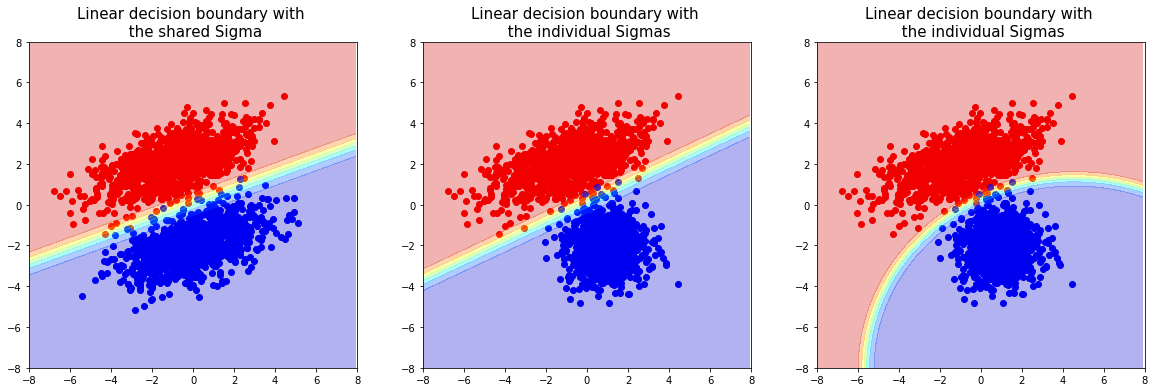

In [4]:
NUM_C_1 = 1000
NUM_C_2 = 1000

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
C_1 = np.random.multivariate_normal([-1,2], [[3,1],[1,1]] , NUM_C_1)
C_2 = np.random.multivariate_normal([0,-2], [[3,1],[1,1]] , NUM_C_2)

X, T = generate_data(C_1, C_2, True)
w = fit(X, T, 15)
plot(w, C_1, C_2, axes[0], True)
axes[0].set_title("Linear decision boundary with \n the shared Sigma", fontsize = 15)

C_2 = np.random.multivariate_normal([1,-2], [[1, 0],[0, 1]], NUM_C_2)
X, T = generate_data(C_1, C_2, True)
w = fit(X, T, 15)
plot(w, C_1, C_2, axes[1], True)
axes[1].set_title("Linear decision boundary with \n the individual Sigmas", fontsize = 15)

X, T = generate_data(C_1, C_2, False)
w = fit(X, T, 100)
plot(w, C_1, C_2, axes[2], False)
axes[2].set_title("Linear decision boundary with \n the individual Sigmas", fontsize = 15)